## The ARIMA model, which stands for AutoRegressive Integrated Moving Average, is a popular statistical method for time series forecasting. It combines three components:

1. **AutoRegressive (AR) part**
2. **Integrated (I) part**
3. **Moving Average (MA) part**


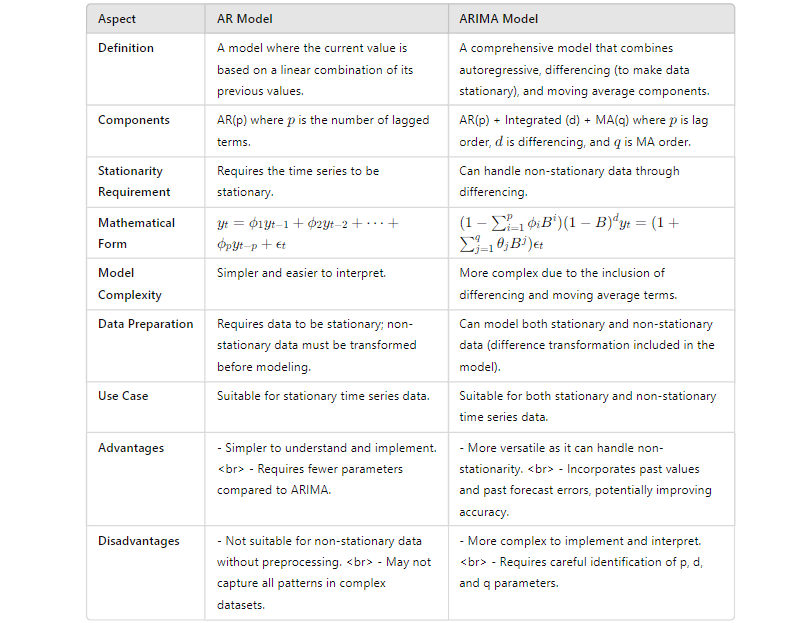



## Mathematical explanation of each component and how they come together in the ARIMA model.

### 1. AutoRegressive (AR) Part
The AR part of the model specifies that the output variable depends linearly on its own previous values. Mathematically, an AR model of order \( p \) (AR(p)) is written as:
\[ y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \epsilon_t \]
where:
- \( y_t \) is the value at time \( t \).
- \( \phi_1, \phi_2, \ldots, \phi_p \) are parameters of the model.
- \( \epsilon_t \) is white noise error term at time \( t \).

### 2. Integrated (I) Part
The integrated part of the model involves differencing the data to make it stationary, which means that the statistical properties (mean, variance) do not change over time. The order of differencing is denoted by \( d \). If \( y_t \) is the original time series, the differenced series \( y_t' \) of order \( d \) is given by:
\[ y_t' = (1 - B)^d y_t \]
where \( B \) is the backshift operator defined as \( By_t = y_{t-1} \).

For example, if \( d = 1 \), the differenced series is:
\[ y_t' = y_t - y_{t-1} \]

### 3. Moving Average (MA) Part
The MA part of the model specifies that the output variable depends linearly on the current and past values of a stochastic (white noise) term. Mathematically, an MA model of order \( q \) (MA(q)) is written as:
\[ y_t = \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} \]
where:
- \( y_t \) is the value at time \( t \).
- \( \theta_1, \theta_2, \ldots, \theta_q \) are parameters of the model.
- \( \epsilon_t, \epsilon_{t-1}, \ldots, \epsilon_{t-q} \) are white noise error terms.

### ARIMA Model
Combining the AR, I, and MA components, the ARIMA model of order \( (p, d, q) \) is represented as:
\[ (1 - B)^d y_t = \phi_1 (1 - B)^d y_{t-1} + \phi_2 (1 - B)^d y_{t-2} + \cdots + \phi_p (1 - B)^d y_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \cdots + \theta_q \epsilon_{t-q} \]

Simplified, it becomes:
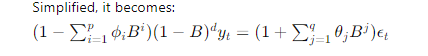

### Steps to Fit an ARIMA Model
1. **Identification**: Determine the values of \( p \), \( d \), and \( q \) using techniques like the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots.
2. **Estimation**: Estimate the parameters \( \phi \) and \( \theta \) using methods like Maximum Likelihood Estimation (MLE).
3. **Diagnostic Checking**: Check the residuals to ensure they resemble white noise using tools like the Ljung-Box test.
4. **Forecasting**: Use the fitted ARIMA model to forecast future values.



### Example
Suppose we have a time series \( y_t \) and we fit an ARIMA(1,1,1) model. This means:
- \( p = 1 \): The series has an autoregressive part of order 1.
- \( d = 1 \): The series has been differenced once to achieve stationarity.
- \( q = 1 \): The series has a moving average part of order 1.



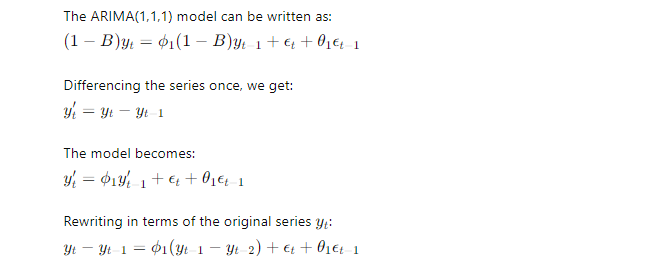

In [3]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example time series data (replace this with your own data)
data = [10, 5, 15, 20, 10, 11, 8, 35, 30, 45]

# Define ARIMA parameters
p = 1  # AR parameter
d = 1  # Differencing parameter
q = 1  # MA parameter

# Fit ARIMA model
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

# Forecast future values
forecast_steps = 4
predictions = model_fit.forecast(steps=forecast_steps)

# Print forecasted values
print("Forecasted values:", predictions)


Forecasted values: [37.64316287 43.56311223 38.79940741 42.63269757]


## Predicting Temp using ARIMA

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Load the historical temperature data 
temperature_data = pd.read_csv('temperature_data.csv')

In [5]:
temperature_data.head(2)

,Date,Temperature,Location
0,2020-01-01,28.820262,City B
1,2020-01-02,22.000786,City B


In [6]:
temperature_data.shape

(3000, 3)

In [8]:
temperature_data.describe(include="object")

,Date,Location
count,3000,3000
unique,3000,3
top,2020-01-01,City B
freq,1,1063


In [9]:
# Convert 'Temperature' column to numeric data type
temperature_data['Temperature'] = pd.to_numeric(temperature_data['Temperature'], errors='coerce')

In [10]:
# Drop rows with missing or NaN values in the 'Temperature' column
temperature_data = temperature_data.dropna(subset=['Temperature'])

In [11]:

# Convert 'Date' column to datetime data type
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'])

In [ ]:
# Set 'Date' column as the index
temperature_data.set_index('Date', inplace=True)

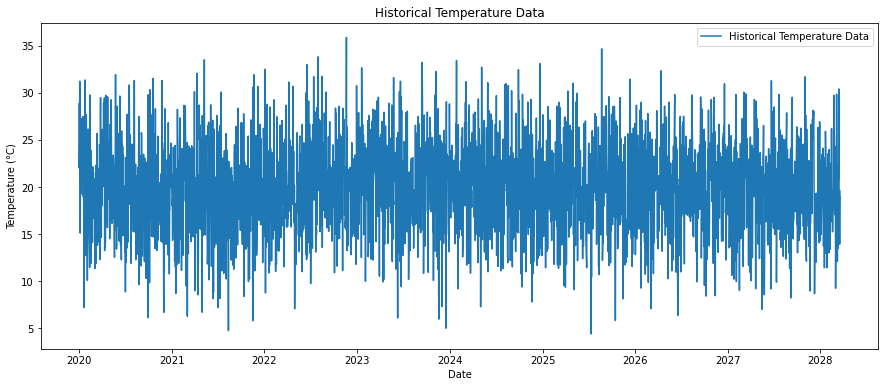

In [14]:

# Visualize the historical temperature data
plt.figure(figsize=(15, 6))
plt.plot(temperature_data.index, temperature_data['Temperature'], label='Historical Temperature Data')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Historical Temperature Data')
plt.legend()
plt.show()

In [15]:
# Define ARIMA parameters
p = 3  # AR parameter
d = 1  # Differencing parameter
q = 2  # MA parameter

# Fit ARIMA model
model = ARIMA(temperature_data['Temperature'], order=(p, d, q))
model_fit = model.fit()

C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\suyashi144893\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


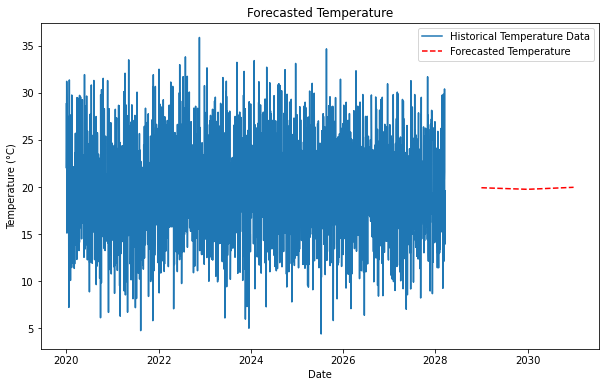

Forecasted temperatures for the next 3 days:
2028-03-19    19.921202
2028-03-20    19.754453
2028-03-21    19.967367
Freq: D, Name: predicted_mean, dtype: float64


In [20]:
# Forecast future temperatures
forecast_steps = 3  # Number of steps to forecast (e.g., 30 days into the future)
forecast = model_fit.forecast(steps=forecast_steps)

# Visualize the forecasted temperatures
plt.figure(figsize=(10, 6))
plt.plot(temperature_data.index, temperature_data['Temperature'], label='Historical Temperature Data')
plt.plot(pd.date_range(start=temperature_data.index[-1], periods=forecast_steps, freq='Y'), forecast, color='red', linestyle='--', label='Forecasted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Forecasted Temperature')
plt.legend()
plt.show()

# Print the forecasted temperatures
print("Forecasted temperatures for the next", forecast_steps, "days:")
print(forecast)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Set the frequency to Monthly Start

# Visualize the data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Fit the ARIMA model
model = ARIMA(data, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=50)
print(forecast)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Set the frequency to Monthly Start

# Visualize the data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Fit the ARIMA model with different order (2, 1, 2)
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=100)
print(forecast)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast (Order: (2, 1, 2))')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Set the frequency to Monthly Start

# Visualize the data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Fit the ARIMA model with different order (2, 1, 2)
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Make predictions
forecast = model_fit.forecast(steps=100)
print(forecast)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Data')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast (Order: (2, 1, 2))')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', index_col='Month', parse_dates=True)
data.index.freq = 'MS'  # Set the frequency to Monthly Start

# Visualize the data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

# Check for stationarity
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}: {value}')
        
adf_test(data['Passengers'])

# Differencing to make the series stationary
data_diff = data.diff().dropna()
adf_test(data_diff['Passengers'])

# Plot ACF and PACF to determine p and q
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(data_diff, ax=axes[0])
plot_pacf(data_diff, ax=axes[1])
plt.show()

# Fit the ARIMA model (using a different set of parameters for illustration)
model = ARIMA(data, order=(2, 1, 2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Model diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

# Forecast
forecast_steps = 100
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='MS')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the results
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Data')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

# Calculate the mean squared error (MSE) for validation
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]
model = ARIMA(train, order=(2, 1, 2))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error: {mse}')
